In [55]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

## Criando alguns dados

In [56]:
from sklearn.datasets import make_blobs

In [57]:
# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

## Visualizando o dado

In [58]:
#plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Criando os clusters

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [60]:
kmeans = KMeans(n_clusters=4)

In [61]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
for k in range(2, 15):
    kmeans_ = KMeans(n_clusters=k, random_state=10)
    kmeans_.fit(data[0])
    print(k, silhouette_score(data[0], kmeans_.predict(data[0])))

2 0.6490840372235874
3 0.5039448843039639
4 0.5519773421333025
5 0.47941446166364243
6 0.38368841727697356
7 0.3726822636475637
8 0.3447035532282299
9 0.35173876632209095
10 0.35733283844148866
11 0.3680357911466244
12 0.36024613368248914
13 0.35903313516271607
14 0.36290047916875595


In [63]:
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735]])

In [64]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

In [65]:
kmeans.labels_

array([0, 3, 2, 3, 3, 1, 3, 2, 3, 2, 0, 2, 3, 3, 0, 2, 3, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 2, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       2, 3, 0, 2, 1, 2, 2, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 3, 1, 0, 3, 2,
       1, 3, 3, 1, 3, 2, 1, 2, 1, 3, 3, 2, 0, 2, 2, 1, 3, 1, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 2, 2, 1, 3, 0, 1, 3, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 2, 3, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 3, 0, 3, 2, 1, 3, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 2, 3,
       2, 0, 3, 3, 3, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 2, 3, 2, 0, 3, 2, 0,
       3, 3, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 3, 0, 1, 2, 3, 3,
       1, 2])

In [67]:
'''
[-4.13591321,  7.95389851],
[-9.46941837, -6.56081545],
[-0.0123077 ,  2.13407664],
[ 3.71749226,  7.01388735]]
'''
kmeans.predict(np.array([-7.000, -6.56081545]).reshape(1, -1))

array([1])

In [68]:
def plot_clusters(data, kmeans):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
    ax1.set_title('K Means')
    ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
    ax1.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='X')
    ax2.set_title("Original")
    ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

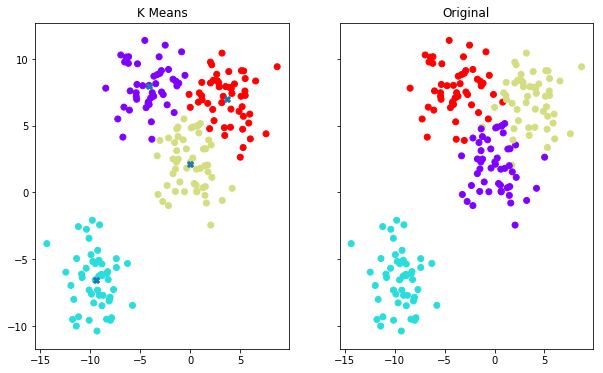

In [69]:
plot_clusters(data, kmeans)

##### Repare que, mesmo apresentando alguns erros, o K-means conseguiu excelentes resultados na separação dos agrupamentos!

### E se mudarmos o número de clusters? Experimente outros valores de K.

In [70]:
kmeans = KMeans(n_clusters=2)

In [71]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

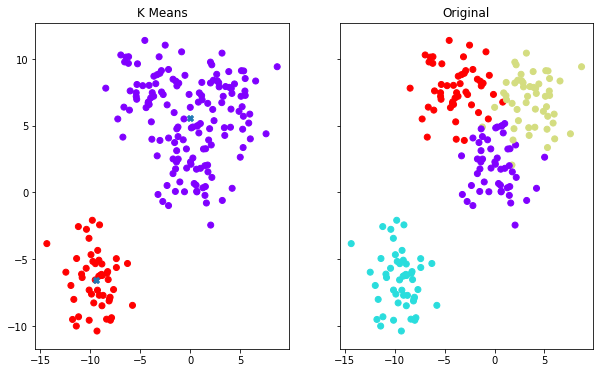

In [72]:
plot_clusters(data, kmeans)

In [82]:
kmeans = KMeans(n_clusters=5)

In [83]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

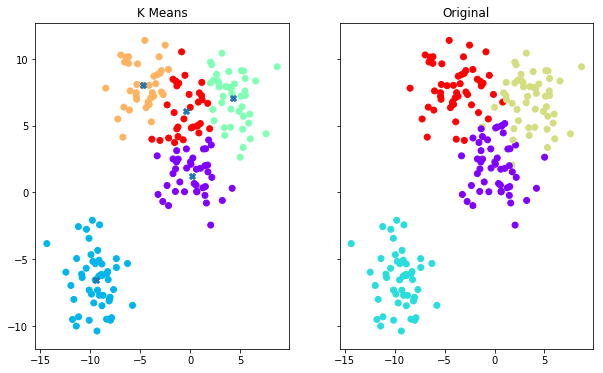

In [84]:
plot_clusters(data, kmeans)